# Load dataset (AirBnb)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
!pip install folium
import folium
from scipy import stats
import numpy as np


In [2]:
url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx"
dataset = pd.ExcelFile(url, engine='openpyxl')

sheets = []
for sheet in dataset.sheet_names:
    df = dataset.parse(sheet)
    df["City"] = sheet #adding a column to track from which group is the data
    sheets.append(df)

df = pd.concat(sheets, ignore_index=True)

In [3]:
df[["City", "days"]] = df["City"].str.split("_", expand=True)

In [4]:
df


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

# Basic cleaning

## Add column for country

In [6]:
df["City"].unique()


array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [7]:
# map cities to countries
city_to_country = {
    "amsterdam": "Netherlands",
    "athens": "Greece",
    "berlin": "Germany",
    "barcelona": "Spain",
    "budapest": "Hungary",
    "lisbon": "Portugal",
    "london": "United Kingdom",
    "paris": "France",
    "rome": "Italy",
    "vienna": "Austria"
}

# create new column
df["country"] = df["City"].map(city_to_country)

# test if it worked
print(df[["City", "country", "days"]].head())


        City      country      days
0  amsterdam  Netherlands  weekdays
1  amsterdam  Netherlands  weekdays
2  amsterdam  Netherlands  weekdays
3  amsterdam  Netherlands  weekdays
4  amsterdam  Netherlands  weekdays


In [8]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [9]:
df["country"].describe()

count              51707
unique                10
top       United Kingdom
freq                9993
Name: country, dtype: object

## change column name

In [10]:
# rename column realSum in Price
df = df.rename(columns={"realSum": "Price"})

# test if it worked
print(df.columns)


Index(['Unnamed: 0', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'days', 'country'],
      dtype='object')


In [11]:
df.head()

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [12]:
# delete first column
df = df.drop(df.columns[0], axis=1)

# test if it worked
print(df.columns)


Index(['Price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'City', 'days', 'country'],
      dtype='object')


## Advanced Cleaning

The variable room_type already shows the three different options, so the two dummy variables room_shared and room_private are redundandent. We can delete them. 

In [13]:
df = df.drop(columns=["room_shared", "room_private"])

# test if it worked
print(df.columns)


Index(['Price', 'room_type', 'person_capacity', 'host_is_superhost', 'multi',
       'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'days', 'country'],
      dtype='object')


Delete the dummy variables for the number of listings of each host. The data will be united in the new variable "host_portfolio"

In [14]:
# create new colomn "host_portfolio"
# "one" if multi and biz are both 0
df["host_portfolio"] = "one"

# If multi is 1, the host has two to four listings
df.loc[df["multi"] == 1, "host_portfolio"] = "two_to_four"

# If biz is 1, the host has more than four listings
df.loc[df["biz"] == 1, "host_portfolio"] = "more_than_four"

# test if it worked
print(df["host_portfolio"].value_counts())


host_portfolio
one               18534
more_than_four    18108
two_to_four       15065
Name: count, dtype: int64


In [15]:
# delete dummys
df = df.drop(columns=["multi", "biz"])
print(df.columns)


Index(['Price', 'room_type', 'person_capacity', 'host_is_superhost',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'days', 'country',
       'host_portfolio'],
      dtype='object')


In [16]:
# download the dataset to check if everything is correct
df.to_csv("airbnb_cleaned.csv", index=False)



# Some basic initial inspection

In [17]:
df.head(7)



,Price,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
0,194.033698,Private room,2,False,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands,two_to_four
1,344.245776,Private room,4,False,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands,one
2,264.101422,Private room,2,False,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands,more_than_four
3,433.529398,Private room,4,False,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands,more_than_four
4,485.552926,Private room,2,True,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands,one
5,552.808567,Private room,3,False,8,100,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays,Netherlands,one
6,215.124317,Private room,2,False,10,94,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays,Netherlands,one


In [18]:
df.tail(7)


,Price,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
51700,115.933899,Private room,4,False,9,94,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,16.33970,48.19325,vienna,weekends,Austria,two_to_four
51701,750.765491,Entire home/apt,6,False,10,96,3,0.378804,0.203138,257.494817,18.440080,548.973296,13.268473,16.37825,48.21001,vienna,weekends,Austria,more_than_four
51702,715.938574,Entire home/apt,6,False,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,Austria,more_than_four
51703,304.793960,Entire home/apt,2,False,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,Austria,one
51704,637.168969,Entire home/apt,2,False,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,Austria,one
51705,301.054157,Private room,2,False,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,Austria,one
51706,133.230489,Private room,4,True,10,93,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,vienna,weekends,Austria,two_to_four


In [19]:
df.sample(7)

,Price,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
16585,169.431781,Entire home/apt,4,False,9,84,0,1.676585,0.399179,145.187992,8.665389,335.121560,29.295640,19.07639,47.49995,budapest,weekends,Hungary,more_than_four
33991,279.149967,Entire home/apt,4,False,9,87,0,3.007901,0.334399,410.457366,19.980926,995.173457,58.475931,2.33316,48.88034,paris,weekdays,France,two_to_four
27079,180.389943,Private room,2,False,9,87,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108,london,weekends,United Kingdom,two_to_four
45984,364.014682,Entire home/apt,5,False,10,80,2,2.555483,1.385010,934.892136,20.712950,2470.930510,53.835581,12.47187,41.89711,rome,weekends,Italy,one
33920,383.539938,Entire home/apt,4,False,10,98,1,2.354215,0.164006,267.441958,13.018984,697.699465,40.996497,2.37471,48.87201,paris,weekdays,France,more_than_four
8157,214.546134,Entire home/apt,2,True,10,97,1,4.005206,0.151181,97.029720,14.789328,115.222048,24.377483,13.37972,52.55156,berlin,weekends,Germany,two_to_four
23027,87.960676,Private room,2,True,10,100,1,15.126524,4.259068,79.719525,5.541393,162.582251,2.911171,0.09000,51.50100,london,weekdays,United Kingdom,two_to_four


In [20]:
#check data types
df.dtypes


Price                         float64
room_type                      object
person_capacity                 int64
host_is_superhost                bool
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
City                           object
days                           object
country                        object
host_portfolio                 object
dtype: object

In [21]:
#basic summary statistics for both categorical and numerical variables
df.describe(include="object")

,room_type,City,days,country,host_portfolio
count,51707,51707,51707,51707,51707
unique,3,10,2,10,3
top,Entire home/apt,london,weekends,United Kingdom,one
freq,32648,9993,26207,9993,18534


In [22]:
df.describe ()

,Price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


## 1.How many listings are in each city in total and also per type of day?

In [23]:
total_listing = df['City'].value_counts()
total_listing

City
london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: count, dtype: int64

In [24]:
listing_by_day = df.groupby(['City', 'days']).size().reset_index(name='count')
listing_by_day

,City,days,count
0,amsterdam,weekdays,1103
1,amsterdam,weekends,977
2,athens,weekdays,2653
3,athens,weekends,2627
4,barcelona,weekdays,1555
5,barcelona,weekends,1278
6,berlin,weekdays,1284
7,berlin,weekends,1200
8,budapest,weekdays,2074
9,budapest,weekends,1948


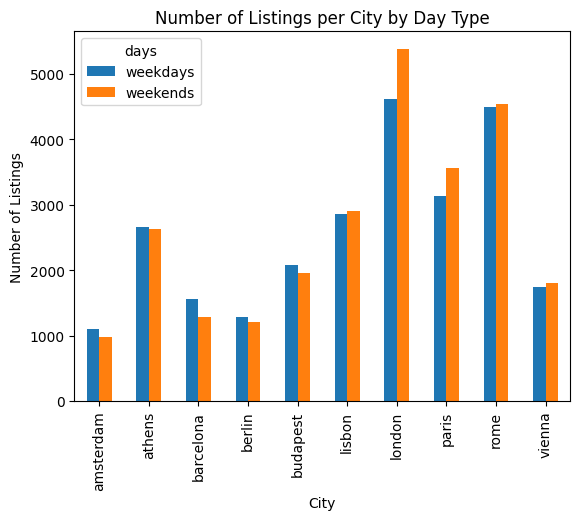

In [25]:
# Bar chart for listings per city and day type
listing_by_day.pivot(index='City', columns='days', values='count').plot(kind='bar')
plt.title('Number of Listings per City by Day Type')
plt.ylabel('Number of Listings')
plt.show()


## 2.Which city has the biggest proportion of superhosts?


In [26]:
Proposition = df.groupby('City')['host_is_superhost'].mean().sort_values(ascending=False)
Proposition

City
athens       0.428598
budapest     0.378916
rome         0.326687
vienna       0.284139
amsterdam    0.284135
berlin       0.257246
lisbon       0.213951
barcelona    0.181433
london       0.157410
paris        0.140700
Name: host_is_superhost, dtype: float64

## 3.Which cities have listings with more than four rooms?


In [27]:
MF4 = df[df["bedrooms"] > 4]['City'].value_counts()
MF4

City
lisbon       10
london        5
amsterdam     4
barcelona     2
berlin        2
paris         2
rome          1
Name: count, dtype: int64

## 4.Which city has the most entire home/apt type listings?


In [28]:
Entire_home = df[df['room_type'] == 'Entire home/apt']['City'].value_counts()
Entire_home

City
rome         5561
paris        5067
athens       4872
london       4384
lisbon       3878
budapest     3589
vienna       2747
amsterdam    1126
berlin        882
barcelona     542
Name: count, dtype: int64

## Are ratings typically high across listings, or is there a wide variation? 
a) Plot the distribution of guest_satisfaction_overall ratings. 


Text(0, 0.5, 'Number of Listings')

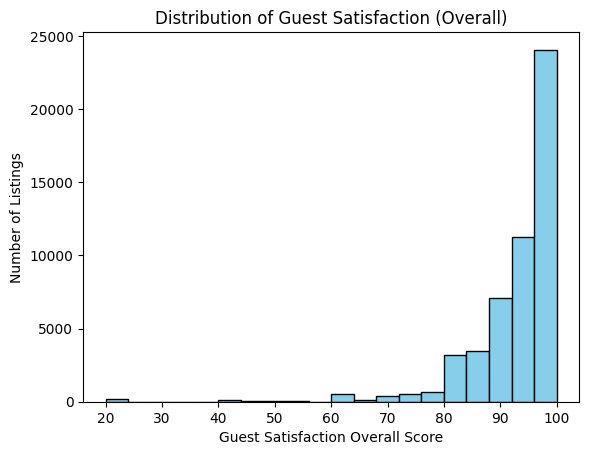

In [29]:
df['guest_satisfaction_overall'].plot(kind='hist', bins=20, color='skyblue', title='Distribution of Guest Satisfaction (Overall)', edgecolor='black')
plt.xlabel('Guest Satisfaction Overall Score')
plt.ylabel('Number of Listings')

In [30]:
df['guest_satisfaction_overall'].describe()

count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64

b) Examine the distribution of cleanliness_rating.

Text(0, 0.5, 'Number of Listings')

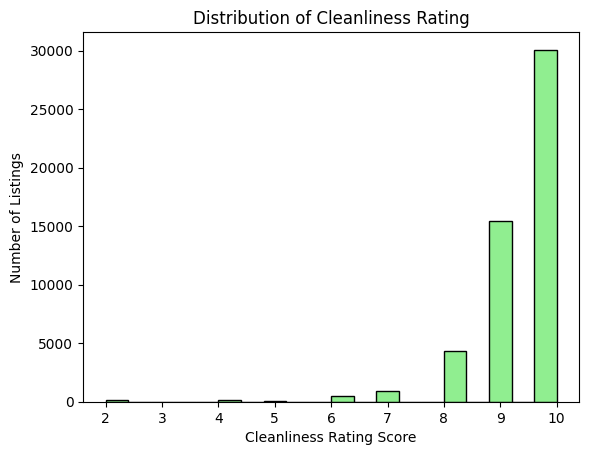

In [31]:
df['cleanliness_rating'].plot(kind='hist', bins=20, color='lightgreen', title='Distribution of Cleanliness Rating', edgecolor='black')
plt.xlabel('Cleanliness Rating Score')
plt.ylabel('Number of Listings')

In [32]:
df['cleanliness_rating'].describe()

count    51707.000000
mean         9.390624
std          0.954868
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: cleanliness_rating, dtype: float64

## How does person_capacity vary across listings? What is the most common capacity of listings?

Text(0.5, 0, 'Person Capacity')

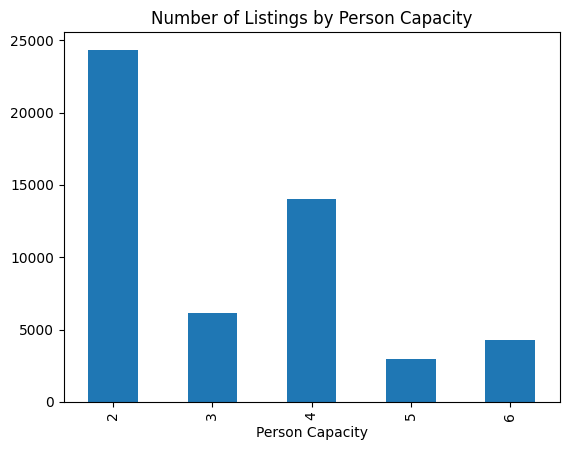

In [33]:
df['person_capacity'].describe()
capacity_counts = df['person_capacity'].value_counts().sort_index()
capacity_counts.plot(kind='bar', title='Number of Listings by Person Capacity')
plt.xlabel('Person Capacity')           

## Plot the distribution of price (former realSum) for both weekday and weekend offers
a) check normality, skewness, modality


In [34]:
df.columns

Index(['Price', 'room_type', 'person_capacity', 'host_is_superhost',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'days', 'country',
       'host_portfolio'],
      dtype='object')

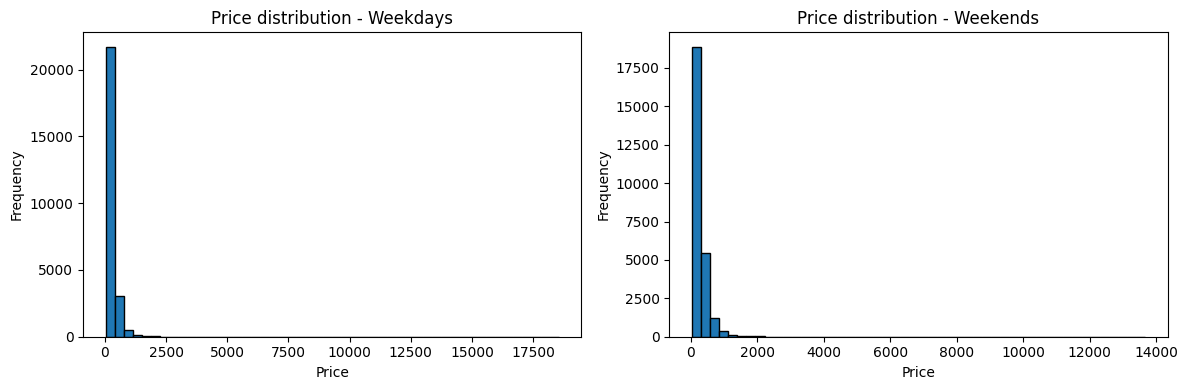

In [35]:
# histograms side-by-side
fig, axes = plt.subplots(1,2, figsize=(12,4))
df[df['days']=='weekdays']['Price'].plot(kind='hist', bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Price distribution - Weekdays')
axes[0].set_xlabel('Price')

df[df['days']=='weekends']['Price'].plot(kind='hist', bins=50, ax=axes[1], edgecolor='black')
axes[1].set_title('Price distribution - Weekends')
axes[1].set_xlabel('Price')
plt.tight_layout()
plt.show()

b) If skewed, consider using transformations (e.g. log); can you normalize it?

In [36]:
# skewness
print("Skewness (weekdays):", df[df['days']=='weekdays']['Price'].skew())
print("Skewness (weekends):", df[df['days']=='weekends']['Price'].skew())

# visual check for modality: histogram + KDE above helps; you can also use scipy's normaltest
print("D'Agostino K^2 test (weekdays):", stats.normaltest(df[df['days']=='weekdays']['Price'].dropna()))
print("D'Agostino K^2 test (weekends):", stats.normaltest(df[df['days']=='weekends']['Price'].dropna()))


Skewness (weekdays): 24.095478894203506
Skewness (weekends): 16.603148732849697
D'Agostino K^2 test (weekdays): NormaltestResult(statistic=np.float64(60617.12618580311), pvalue=np.float64(0.0))
D'Agostino K^2 test (weekends): NormaltestResult(statistic=np.float64(53214.735709396125), pvalue=np.float64(0.0))


Skewness (weekdays, log): 0.7692578703054996
Skewness (weekends, log): 0.6687609545527767


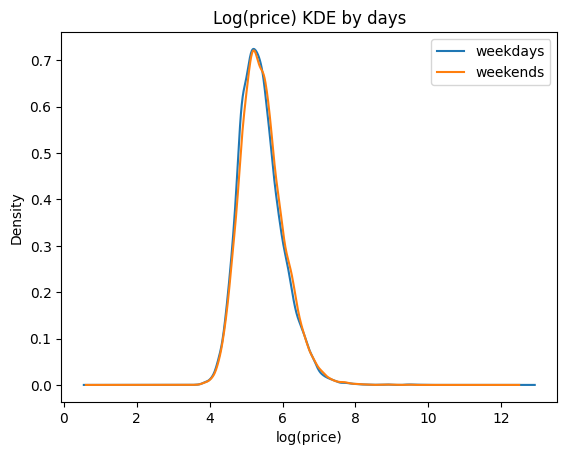

In [37]:
# add small constant in case of zeros
df['log_price'] = np.log1p(df['Price'])

# check skew after log
print("Skewness (weekdays, log):", df[df['days']=='weekdays']['log_price'].skew())
print("Skewness (weekends, log):", df[df['days']=='weekends']['log_price'].skew())

# plot log-price KDEs
df.groupby('days')['log_price'].plot(kind='kde', legend=True)
plt.title('Log(price) KDE by days')
plt.xlabel('log(price)')
plt.show()


## 8.Is there a difference in price per night between two cities? Choose at least three pairs of cities during weekdays.

In [38]:
# Difference in price per night between two cities

weekdays = df[df['days'] == 'weekdays']
city_pairs = [('london','paris'), ('amsterdam','berlin'), ('rome','athens')]
for c1, c2 in city_pairs:
    prices1 = weekdays[weekdays['City'] == c1]['Price']
    prices2 = weekdays[weekdays['City'] == c2]['Price']

    if prices1.empty or prices2.empty:
        print(f"Skipping {c1} vs {c2} (no data)")
        continue

    t_stat, p_val = stats.ttest_ind(prices1, prices2)

    print(f"{c1} vs {c2} | mean1: {prices1.mean():.2f}, mean2: {prices2.mean():.2f}, p-value: {p_val:.4f}")
    print("Difference is significant" if p_val < 0.05 else "Difference is NOT significant")


london vs paris | mean1: 360.23, mean2: 398.79, p-value: 0.0004
Difference is significant
amsterdam vs berlin | mean1: 545.02, mean2: 240.22, p-value: 0.0000
Difference is significant
rome vs athens | mean1: 201.62, mean2: 155.87, p-value: 0.0000
Difference is significant


In [39]:
# Price per night between weekdays and weekends
df.groupby('days')['Price'].mean().round(2)

days
weekdays    275.68
weekends    283.96
Name: Price, dtype: float64

## 10. Are listings of superhosts more expensive than those of normal hosts?

In [40]:
from scipy.stats import mannwhitneyu

# Split data
superhost_prices = df[df['host_is_superhost'] == True]['Price'].dropna()
normalhost_prices = df[df['host_is_superhost'] == False]['Price'].dropna()

# Run the test (one-sided: normal > superhost)
stat, p_value = mannwhitneyu(
    normalhost_prices,
    superhost_prices,
    alternative='greater'
)

# Display results
print("Mann–Whitney U statistic:", stat)
print("p-value:", p_value)
print("Median superhost:", round(superhost_prices.median(), 2))
print("Median normal host:", round(normalhost_prices.median(), 2))
print("Mean superhost:", round(superhost_prices.mean(), 2))
print("Mean normal host:", round(normalhost_prices.mean(), 2))


Mann–Whitney U statistic: 278477238.5
p-value: 5.285064560589961e-59
Median superhost: 197.04
Median normal host: 217.55
Mean superhost: 254.45
Mean normal host: 288.63


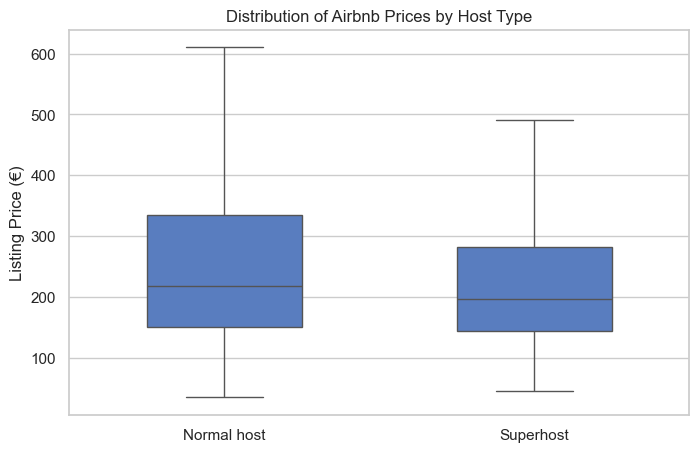

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust style for better visuals
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='host_is_superhost',
    y='Price',
    showfliers=False,  # hide extreme outliers for clearer comparison; prices of up tp 18.000 would render the scale usesless
    width=0.5
)

# Label axes and add title
plt.xticks([0, 1], ['Normal host', 'Superhost'])
plt.xlabel("")
# plt.yscale("log") not required
plt.ylabel("Listing Price (€)")
plt.title("Distribution of Airbnb Prices by Host Type")

plt.show()




## 11. Are superhosts closer to the city center and metro station than normal hosts?

In [42]:
# metro

df.groupby(['host_is_superhost'])['metro_dist'].describe()


,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
False,38475.0,0.681903,0.871487,0.002301,0.243546,0.406985,0.734231,14.273577
True,13232.0,0.680483,0.817646,0.010233,0.262765,0.433326,0.746356,9.286229


In [43]:
# city center

df.groupby(['host_is_superhost'])['dist'].describe()


,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
False,38475.0,3.270057,2.410844,0.015045,1.506846,2.702721,4.361549,25.284557
True,13232.0,2.962239,2.328544,0.039814,1.321117,2.391335,3.961200,20.495678


## 12.Are superhosts cleaner than normal hosts?

In [44]:
# Are superhosts cleaner than normal hosts?
df.groupby('host_is_superhost')['cleanliness_rating'].mean().round(2)

host_is_superhost
False    9.24
True     9.83
Name: cleanliness_rating, dtype: float64

## 13.Is there a pattern between room types and superhost status?


In [45]:

df.groupby('room_type')['host_is_superhost'].mean().sort_values(ascending=False).round(3)

room_type
Entire home/apt    0.274
Private room       0.227
Shared room        0.112
Name: host_is_superhost, dtype: float64

## 14.Is renting an entire home/apt more expensive than a private room? Does that depend on the city?


In [46]:

df.groupby('room_type')['Price'].mean().round(2)

room_type
Entire home/apt    324.32
Private room       204.94
Shared room        143.57
Name: Price, dtype: float64

In [47]:
# Does that depend on the city?
city_room_price = df[df['room_type'].isin(['Entire home/apt', 'Private room', "Shared room"])]
city_room_price.pivot_table(index='City', columns='room_type', values='Price', aggfunc='mean').round(2)

room_type,Entire home/apt,Private room,Shared room
City,,,
amsterdam,734.70,383.47,280.90
athens,155.08,112.84,78.61
barcelona,629.86,214.71,124.07
berlin,363.21,180.52,153.19
budapest,184.57,109.14,126.83
lisbon,282.50,148.90,103.06
london,544.70,220.40,179.82
paris,425.11,299.22,152.36
rome,240.78,148.79,96.73
